In [1]:
# --------------------------------------------------------------------------------------------
# Date:     7/5/2019
# Pgm Name: Pyber_starter   
# Input:    Pyber/Resources/city_data.csv
#           Pyber/Resources/ride_data.csv
# Desc:     Python script analyzes city and ride data to calculate and build Bubble Plot
#           that includes the following:
#           Showcases the relationship between four key variables: 
#           •	Average Fare ($) Per City
#           •	Total Number of Rides Per City
#           •	Total Number of Drivers Per City
#           •	City Type (Urban, Suburban, Rural)
#
#           Also create 3 pie charts that include
#           •	% of Total Fares by City Type
#           •	% of Total Rides by City Type
#           •	% of Total Drivers by City Type
#---------------------------------------------------------------------------------------------

In [2]:

%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import os


# File to Load == city and ride data
city_data_to_load = "../resources/city_data.csv"
ride_data_to_load = "../resources/ride_data.csv"

#get the current working directory
currentDir = os.getcwd()
#print(currentDir)

# Read the City and Ride Data
# Store data in Pandas Data Frames
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Print 5 rows of the citydata frame
#print(city_data_df)

# Combine the data into a single dataset:
#   left join on the city (add the driver_count and city type to the ride data)
organized_df = pd.merge(ride_data_df, city_data_df, on=("city"), how="left")

# Display the data table for preview
organized_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

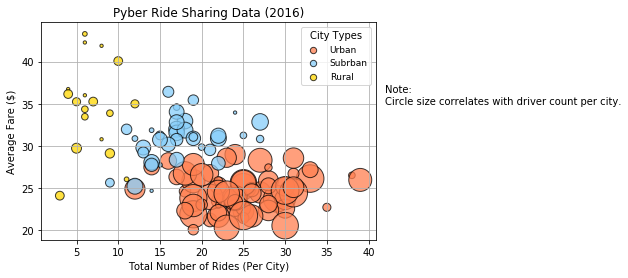

In [3]:
# Obtain the x and y coordinates for each of the three city types

city_fare_summary = organized_df["fare"].sum()
city_ride_count = organized_df["type"].count()
city_ride_type_count = organized_df["type"].value_counts()

#city_ride_count = organized_df["type"].count()
#city_ride_type_count = organized_df["type"].value_counts()

#print(city_fare_summary, city_ride_count, city_ride_type_count)

# Urban == urban summary (x); urban_avg_fare (y)
urban = organized_df.loc[organized_df["type"] == "Urban"]
urban_grouped = urban.groupby(["city"])
urban_count = urban_grouped["type"].value_counts()
urban_fare_summary = urban_grouped["fare"].sum()
urban_avg_fare = urban_fare_summary / urban_count
urban_driver_size = urban_grouped["driver_count"].mean()


urban_type = urban.groupby(["type"])
urban_drivers = urban_type["driver_count"].sum()

#Rural == rural summary (x); rural_avg_fare (y)
rural = organized_df.loc[organized_df["type"] == "Rural"]
rural_grouped = rural.groupby(["city"])
rural_count = rural_grouped["city"].value_counts()
rural_fare_summary = rural_grouped["fare"].sum()
rural_avg_fare = rural_fare_summary / rural_count
rural_driver_size = rural_grouped["driver_count"].mean()

rural_type = rural.groupby(["type"])
rural_drivers = rural_type["driver_count"].sum()


#Suburan == suburban summary (x); suburban_avg_fare (y)
suburban = organized_df.loc[organized_df["type"] == "Suburban"]
suburban_grouped = suburban.groupby(["city"])
suburban_count = suburban_grouped["city"].value_counts()
suburban_fare_summary = suburban_grouped["fare"].sum()
suburban_avg_fare = suburban_fare_summary / suburban_count
suburban_driver_size = suburban_grouped["driver_count"].mean()

# Build the scatter plots for each city types
# include the count for each city type, average fare, and size (size of bubbles)
plt.scatter(urban_count, urban_avg_fare, s=urban_driver_size *11, c="coral", alpha=0.75,edgecolors="black",label="Urban")
plt.scatter(suburban_count, suburban_avg_fare, s=suburban_driver_size *11, c="lightskyblue", alpha=0.75,edgecolors="black",label="Subrban")
plt.scatter(rural_count, rural_avg_fare, s=rural_driver_size *11, c="gold", alpha=0.75,edgecolors="black",label="Rural")
plt.grid()

# Incorporate the other graph properties
# add labels and title
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
legend=plt.legend(fontsize=9, title="City Types", loc="best")
legend.legendHandles[0]._sizes=[40]
legend.legendHandles[1]._sizes=[40]
legend.legendHandles[2]._sizes=[40]

# Incorporate a text label regarding circle size
#  use grid to determine where note should be located
plt.text(42,35,"Note:\nCircle size correlates with driver count per city.",fontsize=10)

plt.show()
# Save Figure


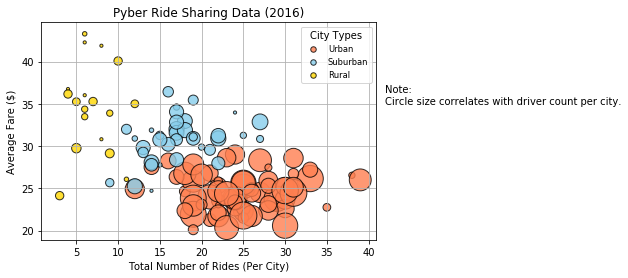

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

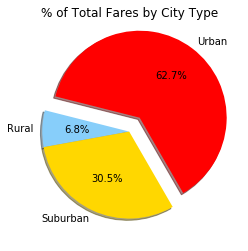

In [4]:
# Calculate Type Percents

total_size = []

# Summarize the fares
urban_total_summary = urban_fare_summary.sum()
rural_total_summary = rural_fare_summary.sum()
suburban_total_summary = suburban_fare_summary.sum()

#calculate the percent
urban_pct = (urban_total_summary / city_fare_summary) * 100
rural_pct = (rural_total_summary / city_fare_summary) * 100
suburban_pct = (suburban_total_summary / city_fare_summary) * 100


# Build Pie Chart == add pct to list
total_size.append("urban_pct")
total_size.append("rural_pct")
total_size.append("suburban_pct")

# Labels for the sections of our pie chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [urban_pct, rural_pct, suburban_pct]

# The colors of each section of the pie chart
colors = ["red","lightskyblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode_pie = (0.2, 0, 0)

plt.title("% of Total Fares by City Type")

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode_pie, labels=labels, colors=colors,startangle=300,
        autopct="%1.1f%%", shadow=True)

# Save Figure
# Save the plot and display it
plt.savefig("../Resources/FaresbyCityType.png")
plt.show()

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

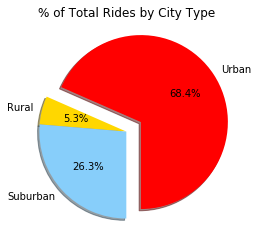

In [6]:
# Calculate Number of Rides

#total rides and total rides by type
total_size = []

#print(city_ride_count, city_ride_type_count)

urban_pct = (city_ride_type_count[0] / city_ride_count) * 100
suburban_pct = (city_ride_type_count[1] / city_ride_count) * 100
rural_pct = (city_ride_type_count[2] / city_ride_count) * 100

# Build Pie Chart
total_size.append("urban_pct")
total_size.append("rural_pct")
total_size.append("suburban_pct")

# The values of each section of the pie chart
sizes = [urban_pct, rural_pct, suburban_pct]

# Labels for the sections of our pie chart
labels = ["Urban","Rural","Suburban"]

# The colors of each section of the pie chart
colors = ["red", "gold", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode_pie = (0.2, 0, 0)

plt.title("% of Total Rides by City Type")

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode_pie, labels=labels, colors=colors,startangle=270,
        autopct="%1.1f%%", shadow=True)


# Save Figure
# Save the plot and display it
plt.savefig("../Resources/RidesbyCityType.png")
plt.show()


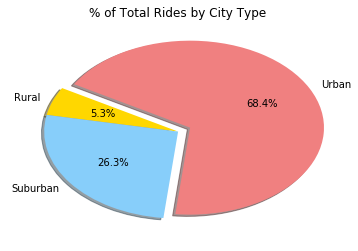

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

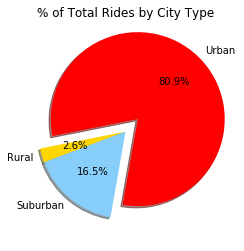

In [7]:
# Calculate Driver Percents

total_size = []
city_ride_count = organized_df["type"].count()
city_ride_type_count = organized_df["type"].value_counts()

#print("city ride count --- city ride type count")
#print(city_ride_count, city_ride_type_count)

urban_pct = (city_ride_type_count[0] / city_ride_count) * 100
suburban_pct = (city_ride_type_count[1] / city_ride_count) * 100
rural_pct = (city_ride_type_count[2] / city_ride_count) * 100
#print("pct")
#print(urban_pct, suburban_pct, rural_pct)

total_size = []
#city_ride_count = organized_df["type"].count()

drivers_total_summary = organized_df["driver_count"].sum()   ##summarize the driver_count 68,709
#drivers_summary = organized_df.groupby(["type"])   
drivers_summary = city_data_df.groupby(["type"])                
drivers_summary_type = drivers_summary["driver_count"].sum()   ##urb=59,602 sub=8570, rural=537

#print(drivers_total_summary, urban_drivers, drivers_summary_type)

# Build Pie Charts
rural_pct = (drivers_summary_type[0] / drivers_total_summary) * 100
suburban_pct = (drivers_summary_type[1] / drivers_total_summary) * 100
urban_pct = (drivers_summary_type[2] / drivers_total_summary) * 100

#print(rural_pct, suburban_pct, urban_pct)

# Build Pie Chart
total_size.append("urban_pct")
total_size.append("rural_pct")
total_size.append("suburban_pct")

# The values of each section of the pie chart
sizes = [urban_pct, rural_pct, suburban_pct]

# Labels for the sections of our pie chart
labels = ["Urban","Rural","Suburban"]

# The colors of each section of the pie chart
colors = ["red", "gold", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode_pie = (0.2, 0, 0)

plt.title("                             ")
plt.title("% of Total Rides by City Type")

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode_pie, labels=labels, colors=colors,startangle=260,
        autopct="%1.1f%%", shadow=True)


# Save Figure
# Save the plot and display it
plt.savefig("../Resources/DriversbyCityType.png")
plt.show()

# Save Figure


In [8]:
# Show Figure
plt.show()

In [ ]:
Pyber Data Trends
 
1.	The riding service was utilized predominantly by the Urban community 
2.	The urban community also dominated the percentage of total rides and fares by city type
3.	Suburban usage was significantly lower than urban usage but it much larger than the rural community
